# groupby 연습

- 파이썬으로 테이블 다루기
- 데이터 프레임 시각화 연습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from numpy.random import choice

## 판매 데이터 생성

In [2]:
year = choice(np.arange(2016,2021),30)
year

array([2020, 2017, 2017, 2020, 2018, 2016, 2018, 2017, 2017, 2018, 2017,
       2017, 2018, 2020, 2017, 2016, 2019, 2017, 2018, 2018, 2020, 2018,
       2019, 2019, 2018, 2017, 2017, 2020, 2020, 2017])

In [3]:
item = choice(("A", "B", "C"),30); item

array(['A', 'A', 'C', 'A', 'A', 'B', 'A', 'C', 'C', 'C', 'A', 'C', 'A',
       'C', 'A', 'C', 'C', 'B', 'A', 'A', 'C', 'B', 'A', 'C', 'B', 'A',
       'B', 'B', 'A', 'B'], dtype='<U1')

In [4]:
no = choice(np.arange(3,9),30)
price = choice(np.arange(20,50,10),30)

df = pd.DataFrame({"year":year, "item":item, "no":no,  'price':price})
df

,year,item,no,price
0,2020,A,3,40
1,2017,A,8,30
2,2017,C,6,40
3,2020,A,3,20
4,2018,A,6,20
5,2016,B,4,40
6,2018,A,4,40
7,2017,C,4,40
8,2017,C,6,30
9,2018,C,3,40


In [5]:
df_year =  df.groupby("year")
df_year

In [6]:
df_year.ngroups # 그룹 수

5

In [7]:
df_year.groups # 그룹에 속한 인덱스 보기

{2016: [5, 15], 2017: [1, 2, 7, 8, 10, 11, 14, 17, 25, 26, 29], 2018: [4, 6, 9, 12, 18, 19, 21, 24], 2019: [16, 22, 23], 2020: [0, 3, 13, 20, 27, 28]}

In [8]:
df_year.size()

year
2016     2
2017    11
2018     8
2019     3
2020     6
dtype: int64

In [9]:
df_year.count()

,item,no,price
year,,,
2016,2,2,2
2017,11,11,11
2018,8,8,8
2019,3,3,3
2020,6,6,6


In [10]:
df_year.get_group(2019)

,year,item,no,price
16,2019,C,6,30
22,2019,A,8,30
23,2019,C,5,40


In [11]:
df

,year,item,no,price
0,2020,A,3,40
1,2017,A,8,30
2,2017,C,6,40
3,2020,A,3,20
4,2018,A,6,20
5,2016,B,4,40
6,2018,A,4,40
7,2017,C,4,40
8,2017,C,6,30
9,2018,C,3,40


In [12]:
for item, group in df.groupby('item'):
    group.to_csv(item + '.csv')
    print(item)
    print(group)
    print(group['no'].mean())

A
    year item  no  price
0   2020    A   3     40
1   2017    A   8     30
3   2020    A   3     20
4   2018    A   6     20
6   2018    A   4     40
10  2017    A   7     20
12  2018    A   6     30
14  2017    A   4     30
18  2018    A   7     30
19  2018    A   4     30
22  2019    A   8     30
25  2017    A   7     40
28  2020    A   8     30
5.769230769230769
B
    year item  no  price
5   2016    B   4     40
17  2017    B   6     20
21  2018    B   4     30
24  2018    B   4     20
26  2017    B   8     20
27  2020    B   7     30
29  2017    B   7     20
5.714285714285714
C
    year item  no  price
2   2017    C   6     40
7   2017    C   4     40
8   2017    C   6     30
9   2018    C   3     40
11  2017    C   3     30
13  2020    C   4     20
15  2016    C   8     20
16  2019    C   6     30
20  2020    C   8     20
23  2019    C   5     40
5.3


In [13]:
!cat B.csv

,year,item,no,price
5,2016,B,4,40
17,2017,B,6,20
21,2018,B,4,30
24,2018,B,4,20
26,2017,B,8,20
27,2020,B,7,30
29,2017,B,7,20


In [14]:
df_year.no.aggregate(['max', 'min', 'count', 'median', 'mean', 'size','std'])

,max,min,count,median,mean,size,std
year,,,,,,,
2016,8,4,2,6.0,6.000000,2,2.828427
2017,8,3,11,6.0,6.000000,11,1.673320
2018,7,3,8,4.0,4.750000,8,1.388730
2019,8,5,3,6.0,6.333333,3,1.527525
2020,8,3,6,5.5,5.500000,6,2.428992


In [15]:
def big_sale(x):
    m = x.mean()
    
    return True if m > 3 else False
df_year.no.agg(['max', 'mean',  big_sale])

,max,mean,big_sale
year,,,
2016,8,6.000000,True
2017,8,6.000000,True
2018,7,4.750000,True
2019,8,6.333333,True
2020,8,5.500000,True


In [16]:
df_year.no.max()

year
2016    8
2017    8
2018    7
2019    8
2020    8
Name: no, dtype: int64

In [17]:
df_year.mean() # 모든 수치형 컬럼에 적용된다

,no,price
year,,
2016,6.000000,30.000000
2017,6.000000,29.090909
2018,4.750000,30.000000
2019,6.333333,33.333333
2020,5.500000,26.666667


## 트랜스폼
- apply()와 유사하다

In [18]:
standardization = lambda x: (x - x.mean()) / x.std()
# 데이터프레임에 시리즈를 대상으로 apply() 수행하는 것과 유하
df_year.no.transform(standardization)

0    -1.029234
1     1.195229
2     0.000000
3    -1.029234
4     0.900103
5    -0.707107
6    -0.540062
7    -1.195229
8     0.000000
9    -1.260144
10    0.597614
11   -1.792843
12    0.900103
13   -0.617540
14   -1.195229
15    0.707107
16   -0.218218
17    0.000000
18    1.620185
19   -0.540062
20    1.029234
21   -0.540062
22    1.091089
23   -0.872872
24   -0.540062
25    0.597614
26    1.195229
27    0.617540
28    1.029234
29    0.597614
Name: no, dtype: float64

## 필터
- 조건에 맞는 샘플만 얻는다

In [19]:
df

,year,item,no,price
0,2020,A,3,40
1,2017,A,8,30
2,2017,C,6,40
3,2020,A,3,20
4,2018,A,6,20
5,2016,B,4,40
6,2018,A,4,40
7,2017,C,4,40
8,2017,C,6,30
9,2018,C,3,40


In [20]:
df.groupby('item').groups

{'A': [0, 1, 3, 4, 6, 10, 12, 14, 18, 19, 22, 25, 28], 'B': [5, 17, 21, 24, 26, 27, 29], 'C': [2, 7, 8, 9, 11, 13, 15, 16, 20, 23]}

In [21]:
df.groupby('item').filter(lambda x: len(x) > 8 )

,year,item,no,price
0,2020,A,3,40
1,2017,A,8,30
2,2017,C,6,40
3,2020,A,3,20
4,2018,A,6,20
6,2018,A,4,40
7,2017,C,4,40
8,2017,C,6,30
9,2018,C,3,40
10,2017,A,7,20


##  이중 그루핑
- 인덱스를 이중으로

In [22]:
df.groupby(['year','item']).sum()

no  price
year item           
2016 B      4     40
     C      8     20
2017 A     26    120
     B     21     60
     C     19    140
2018 A     27    150
     B      8     50
     C      3     40
2019 A      8     30
     C     11     70
2020 A     14     90
     B      7     30
     C     12     40

In [23]:
df1 = df.groupby(['item','year']).sum(); df1

no  price
item year           
A    2017  26    120
     2018  27    150
     2019   8     30
     2020  14     90
B    2016   4     40
     2017  21     60
     2018   8     50
     2020   7     30
C    2016   8     20
     2017  19    140
     2018   3     40
     2019  11     70
     2020  12     40

In [24]:
df1["total"] = df1.no*df1.price
df1

no  price  total
item year                  
A    2017  26    120   3120
     2018  27    150   4050
     2019   8     30    240
     2020  14     90   1260
B    2016   4     40    160
     2017  21     60   1260
     2018   8     50    400
     2020   7     30    210
C    2016   8     20    160
     2017  19    140   2660
     2018   3     40    120
     2019  11     70    770
     2020  12     40    480

In [25]:
df2 = df.groupby(['year','item']).sum().reset_index(level='item'); df2

,item,no,price
year,,,
2016,B,4,40
2016,C,8,20
2017,A,26,120
2017,B,21,60
2017,C,19,140
2018,A,27,150
2018,B,8,50
2018,C,3,40
2019,A,8,30


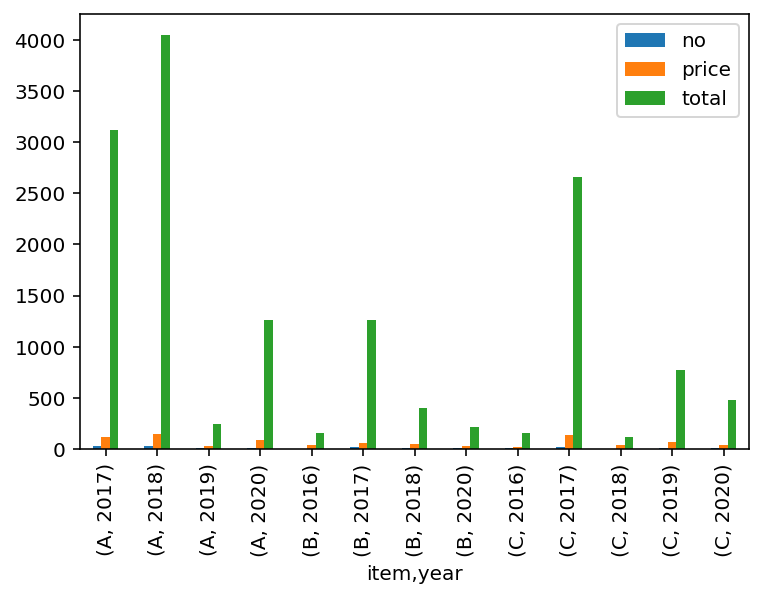

In [26]:
df1.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f886bb3d0>,
      dtype=object)

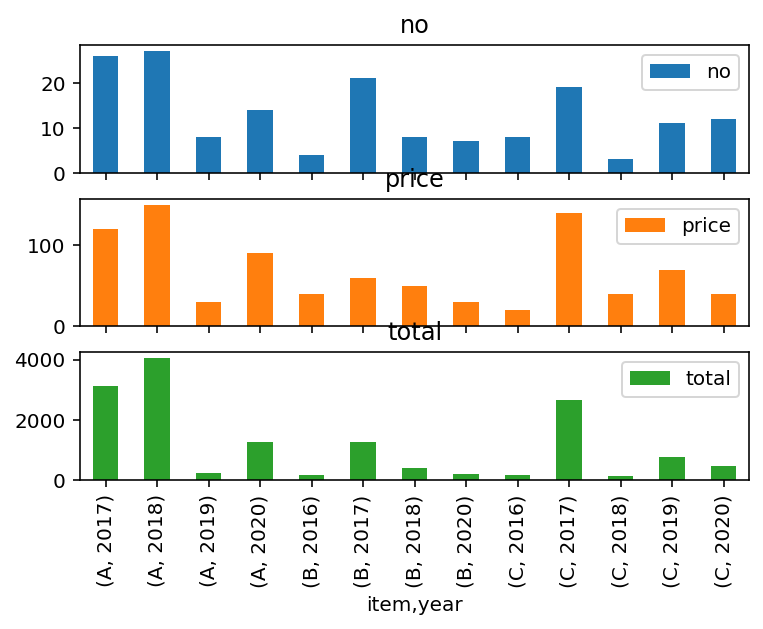

In [27]:
df1.plot.bar(subplots=True)

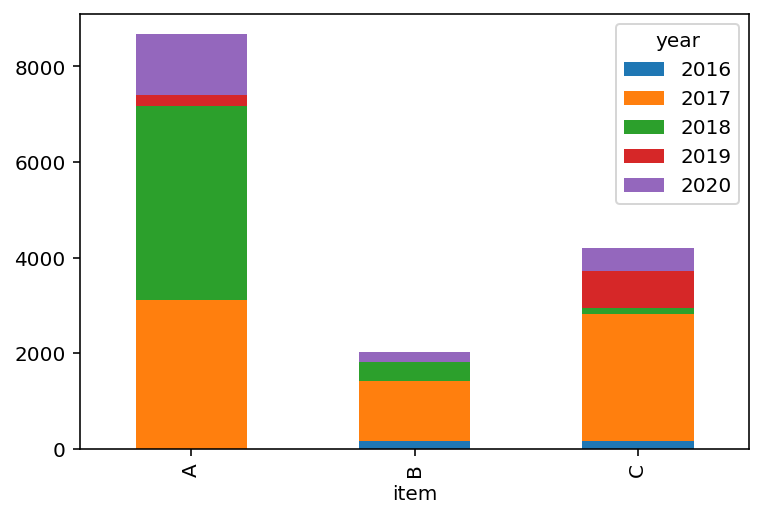

In [28]:
df1.total.unstack(level='year').plot(kind='bar', stacked=True)

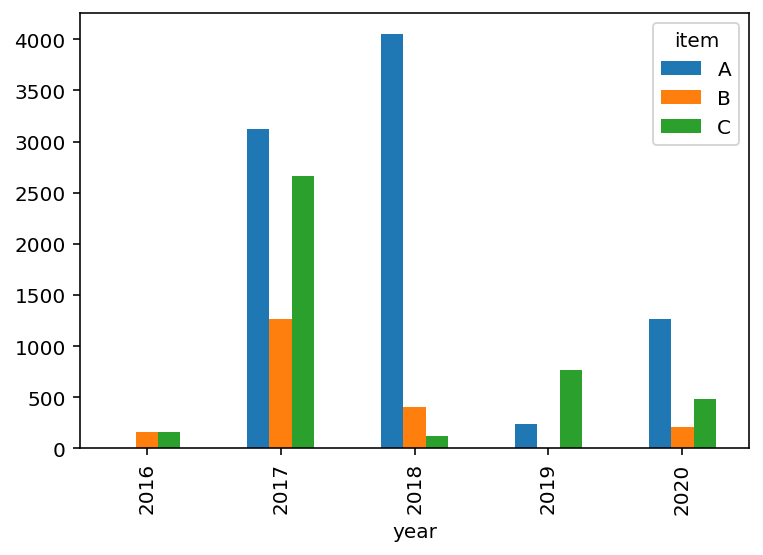

In [29]:
df1.total.unstack(level='item').plot(kind='bar')

## 면적 그래프

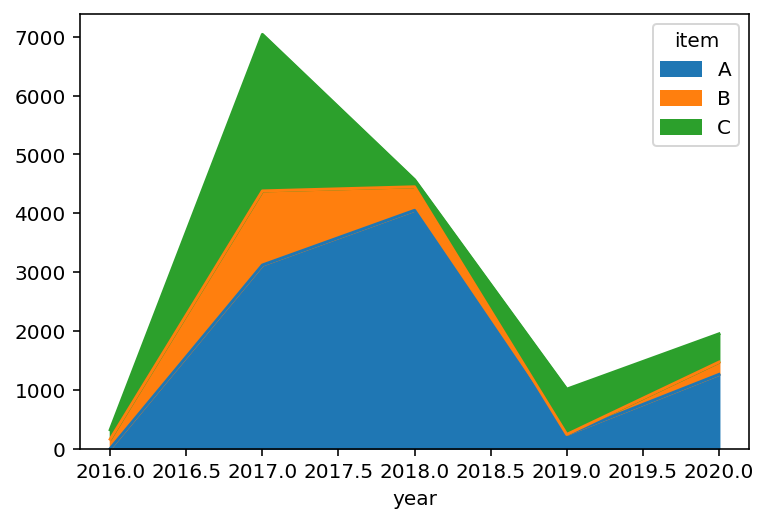

In [30]:
df1.total.unstack(level='item').plot.area()

# 버블 차트

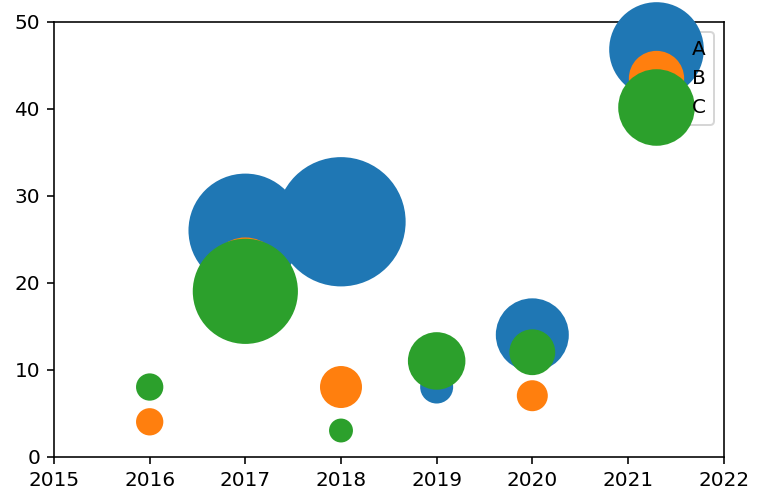

In [31]:
plt.xlim(2015,2022)
plt.ylim(0,50)
for item in ["A", "B", "C"]:
    df3 = df1.loc[item]
    plt.scatter(df3.index, df3.no, s=df3.total, label=item)
plt.legend()


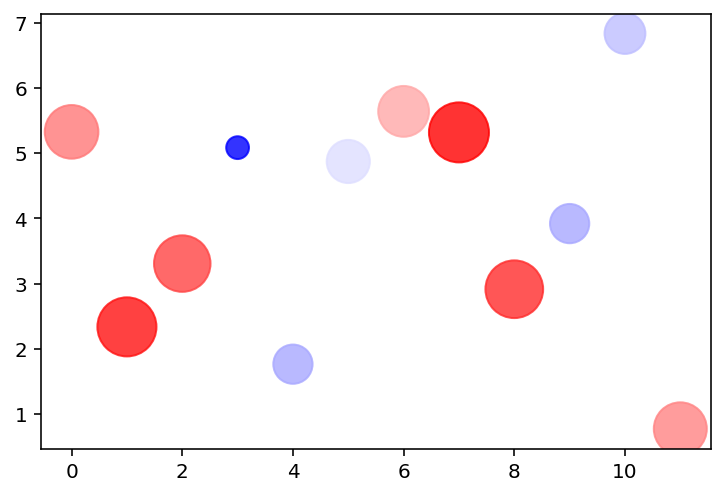

In [32]:
amount = np.random.rand(12)
size = amount*1000
y = np.random.rand(12)*10
plt.scatter(range(12), y,  s=size, c=amount, cmap='bwr', alpha=0.8)